In [1]:
## Importing libraries
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Get a first look at the data

In [2]:
### Import Labor force survey 
## 2556 Q1
LFS_56_Q1, meta_56_Q1 = pyreadstat.read_sav("D:\Onedrive-CEU\OneDrive - Central European University\CEU\Thesis\Thesis_code\Data\LFS\LFS561.SAV")

In [3]:
LFS_56_Q1

,REG,CWD,AMP,TMB,AREA,ED,VILLAGE,BLKV,ROTA_GR,SAMSET,...,EFFECT_ND,EFFECT_RD,LAY_OFF,ASSIST,Desire,Course,Ryear,Dcourse,No_Desire,yround
0,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,561.0
1,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,561.0
2,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,561.0
3,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561.0
4,1.0,10.0,1.0,2.0,1.0,17.0,0.0,151.0,2.0,A,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226611,5.0,96.0,13.0,3.0,2.0,9.0,7.0,54.0,3.0,B,...,NaN,NaN,NaN,NaN,1.0,31.0,0.0,NaN,NaN,561.0
226612,5.0,96.0,13.0,3.0,2.0,9.0,7.0,54.0,3.0,B,...,NaN,NaN,NaN,NaN,1.0,31.0,0.0,NaN,NaN,561.0
226613,5.0,96.0,13.0,3.0,2.0,9.0,7.0,54.0,3.0,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561.0
226614,5.0,96.0,13.0,3.0,2.0,9.0,7.0,54.0,3.0,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561.0


In [4]:
### What does each column mean
meta_56_Q1.column_names_to_labels

{'REG': 'REGION',
 'CWD': 'CHANGWAD IN REGION',
 'AMP': None,
 'TMB': None,
 'AREA': 'AREA',
 'ED': None,
 'VILLAGE': None,
 'BLKV': None,
 'ROTA_GR': 'ROTATION GROUP',
 'SAMSET': 'SAMPLE SET',
 'MONTH': 'MONTH',
 'YEAR': 'YEAR',
 'HH_NO': 'HOUSEHOLD NUMBER',
 'HH_TYPE': 'HOUSEHOLD TYPE',
 'HH_MEM': 'NUMBER OF PERSON IN HOUSEHOLD',
 'LISTING': 'LISTING OF PERSON IN HOUSEHOLD',
 'ENUM': 'ENUMERATION',
 'LINE_NO': 'HH MEMBER NO.',
 'RELA': 'RELATION TO HEAD OF HH',
 'SEX': 'SEX',
 'AGE': 'AGE',
 'MRSTAT': 'MARITAL STATUS',
 'STUDYLEV': 'ATTENDING SCHOOL LEVEL',
 'GRADE': 'GRADE COMPLETED',
 'SUBJECT': 'SUBJECT COMPLETED',
 'LINE': 'SUBJECT FOR HIGHEST EDUCATION COMPLETED',
 'WKLW': 'WORK LAST WEEK',
 'RECEIVE': 'RECEIVE INCOME',
 'PERJOB': 'HAVE PERMANENT JOB',
 'ABSENT': 'HOW LONG LEAVE',
 'LOOKWK': 'LOOKED FOR WORK',
 'METHOD': 'HOW LOOKED FOR WORK',
 'AVAIWK': 'AVAILABLE FOR WORK',
 'REUNWK': 'REASON UNAVAILABLE FOR WORK',
 'RE_NLOOK': 'REASON NOT LOOKING FOR WORK',
 'LENLKWK': 'HOW L

In [5]:
## Label of each column
meta_56_Q1.variable_to_label

{'REG': 'labels0',
 'AREA': 'labels1',
 'HH_TYPE': 'labels2',
 'RELA': 'labels3',
 'SEX': 'labels4',
 'MRSTAT': 'labels5',
 'LINE': 'labels6',
 'WKLW': 'labels7',
 'RECEIVE': 'labels8',
 'PERJOB': 'labels9',
 'ABSENT': 'labels10',
 'LOOKWK': 'labels11',
 'METHOD': 'labels12',
 'AVAIWK': 'labels13',
 'REUNWK': 'labels14',
 'RE_NLOOK': 'labels15',
 'LENLKWK': 'labels16',
 'EVERWK': 'labels17',
 'RESNUEMP': 'labels18',
 'DR_UNEM': 'labels19',
 'WKSTAT': 'labels20',
 'FIRMSIZE': 'labels21',
 'ADD_HWK': 'labels22',
 'FINDING': 'labels23',
 'RENOMORE': 'labels24',
 'TWAGE': 'labels25',
 'LASTMEM': 'labels26',
 'RAISE_WG': 'labels27',
 'SUIT_WG': 'labels28',
 'EFFECT_ST': 'labels29',
 'EFFECT_ND': 'labels30',
 'EFFECT_RD': 'labels31',
 'LAY_OFF': 'labels32',
 'ASSIST': 'labels33',
 'Desire': 'labels34',
 'Ryear': 'labels35',
 'No_Desire': 'labels36'}

In [6]:
### Value labels (What does each value in each column mean)

meta_56_Q1.value_labels

{'labels0': {1.0: 'BANGKOK AND METROPOLIS',
  2.0: 'CENTRAL',
  3.0: 'NORTH',
  4.0: 'NORTHEAST',
  5.0: 'SOUTH'},
 'labels1': {1.0: 'MUNICIPAL', 2.0: 'NON-MUNICIPAL'},
 'labels2': {1.0: 'PRIVATE HOUSEHOLD', 2.0: 'SPECIAL HOUSEHOLD'},
 'labels3': {0.0: 'MEMBER IN SPECIAL HH',
  1.0: 'HEAD OF HH',
  2.0: 'SPOUSE',
  3.0: 'UNMARRIED CHILD',
  4.0: 'MARRIED CHILD',
  5.0: 'CHILD IN-LAW',
  6.0: 'GRAND CHILD',
  7.0: 'PARENTS',
  8.0: 'RELATIVES',
  9.0: 'OTHERS'},
 'labels4': {1.0: 'MALE', 2.0: 'FEMALE'},
 'labels5': {1.0: 'SINGLE',
  2.0: 'MARRIED',
  3.0: 'WIDOW',
  4.0: 'DIVORCED',
  5.0: 'SEPERATED',
  6.0: 'MARRIED BUT UNKNOWN'},
 'labels6': {1.0: 'ACADEMIC', 2.0: 'VOCATIONAL', 3.0: 'TEACHER TRAINING'},
 'labels7': {1.0: 'WORKED', 2.0: "DIDN'T WORK"},
 'labels8': {1.0: 'RECIEVED', 2.0: "DIN'T RECIEVED"},
 'labels9': {1.0: 'HAD', 2.0: "DIDN'T HAVE"},
 'labels10': {1.0: 'LE 2 MONTH', 2.0: 'GT 2 MONTH'},
 'labels11': {1.0: 'LOOKED 7 DAYS',
  2.0: 'LOOKED 8-30 DAYS',
  3.0: "DIDN'T LOOK"

### Keeping Only Labor Force

Value labels of 'WKCODE': 'WORK STATUS RECODE'

For 2528 - 2543:
- 01-08: Employed
- 09-12, 14-17: Unemployed
- **19-20, 22-26: Not in labor force** &rarr; 01-18, 21: Labor force
- 13, 18, 21: Waiting for season.

**Note**: must also exclude people age under 15 years old manually.

For 2544 - 2550:
- 01-03: Employed
- 04-05: Unemployed
- **06-07, 09-12: Not in labor force** &rarr; 01-05, 08: Labor force
- 08: Waiting for season.
- 13: Persons under 15 years old

For 2551 - recent:
- 01-03: Employed
- 04-05: Unemployed
- **06-07, 09-13: Not in labor force** &rarr; 01-05, 08: Labor force
- 08: Waiting for season.
- 14: Persons under 15 years old



In [7]:
### Crete functions to exclude people who are not in labor force.
## Excluding people who are not in labor force (2544 - recent)
def exclude_not_LF(LFS_df): # drop WKCODE == 06-07 or >= 09.
    x = LFS_df.drop(LFS_df[(LFS_df["WKCODE"] == 6) | (LFS_df["WKCODE"] == 7) | (LFS_df["WKCODE"] >= 9)].index)
    return x

In [8]:
## Apply the function to the data (use pipe since the input is a dataframe)
LFS_56_Q1 = LFS_56_Q1.pipe(exclude_not_LF)

In [9]:
## Check the total labor force (sum WT)
LFS_56_Q1["WT"].sum()

# correct!

39134120.86750001

### Keeping Only Relevant Columns.

In [10]:
### Keep only the necessary columns: REG, CWD, YEAR, AGE, EDCODE, WKCODE, OCCUP, INDUST, PERMONTH, WT
LFS_56_Q1 = LFS_56_Q1[["REG", "CWD", "YEAR", "AGE", "EDCODE", "WKCODE", "OCCUP", "INDUST", "PERMONTH", "WT"]]

## Recoding Variables

### Recoding Regions
I seperate the eastern provinces from the central province since industrial parks are mostly located in the eastern provinces.

In [11]:
## Import new province code.
New_province = pd.read_csv("D:\Onedrive-CEU\OneDrive - Central European University\CEU\Thesis\Thesis_code\Data\Province_code.csv")

## Merge with LFS.
LFS_56_Q1 = pd.merge(LFS_56_Q1, New_province[["REG_NEW", "CWD"]], how = 'left', left_on = 'CWD', right_on = 'CWD')

## move REG_NEW to the first column, drop REG.
cols = LFS_56_Q1.columns.tolist()
cols = cols[-1:] + cols[:-1]
LFS_56_Q1 = LFS_56_Q1[cols]

## drop REG and CWD
LFS_56_Q1 = LFS_56_Q1.drop(columns = ["REG", "CWD"])


LFS_56_Q1


,REG_NEW,YEAR,AGE,EDCODE,WKCODE,OCCUP,INDUST,PERMONTH,WT
0,1,56.0,46.0,11.0,1.0,5221.0,47711.0,NaN,877.8005
1,1,56.0,40.0,5.0,1.0,5223.0,47711.0,NaN,881.6978
2,1,56.0,22.0,3.0,1.0,9111.0,97000.0,6000.0,545.8329
3,1,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,56.0,77.0,2.0,1.0,5221.0,47711.0,NaN,738.7725
...,...,...,...,...,...,...,...,...,...
133066,6,56.0,47.0,1.0,1.0,6112.0,1261.0,NaN,378.8351
133067,6,56.0,40.0,3.0,1.0,5120.0,85101.0,4500.0,421.1832
133068,6,56.0,21.0,3.0,1.0,6112.0,1261.0,NaN,711.6193
133069,6,56.0,18.0,3.0,1.0,6112.0,1261.0,NaN,677.1118


### Coding Sector.

From *INDUST* variable

From 2528 - 2543, the standard is ISIC Rev (4 digits)1:
- Agriculture: 01-04
- Industry: 11-52
- Services: 61-90

From 2544 - 2553, the standard is ISIC Rev 3. (4 digits):
- Agriculture: 01-05
- Industry: 10-45
- Services: 50-99

From 2554 - recent years, the standard is TSIC 2009 (5 digits):
- Agriculture: 01-03
- Industry: 05-43
- Services: 45-99

In [12]:
### Define function to code SECTOR (from the first two digits of INDUST)

## function for 2528-2543.
def sector_create_28(row): 
    # First, convert INDUST from float to string.
    x = str(row["INDUST"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan
    
    ## In case x is less than 4 digits, add 0 in front. And use the first two digits.
    elif len(x) < 4:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 4 digits, take it as it is.
    elif len(x) == 4:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-04
    if (x >= 1) & (x <= 4):
        return "Agriculture"
    # Industry: 11-52
    elif (x >= 11) & (x <= 52):
        return "Industry"
    # Services: 61-90
    elif (x >= 61) & (x <= 90):
        return "Services"
    

## function for 2544-2553.
def sector_create_44(row):
    # First, convert INDUST from float to string.
    x = str(row["INDUST"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan
    
    ## In case x is less than 4 digits, add 0 in front. And use the first two digits.
    elif len(x) < 4:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 4 digits, take it as it is.
    elif len(x) == 4:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-05
    if (x >= 1) & (x <= 5):
        return "Agriculture"
    # Industry: 10-45
    elif (x >= 10) & (x <= 45):
        return "Industry"
    # Services: 50-99
    elif (x >= 50) & (x <= 99):
        return "Services"


## function for 2554-recent.
def sector_create_54(row):
    # First, convert INDUST from float to string.
    x = str(row["INDUST"])
    # remove the decimal part.
    x = x.split(".")[0]

    # If x is missing, return missing.
    if x == "nan":
        return np.nan
    
    ## In case x is less than 5 digits, add 0 in front. And use the first two digits.
    elif len(x) < 5:
        x = "0" + x
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)
    
    ## If it is already 5 digits, take it as it is.
    elif len(x) == 5:
        x = x[:2]
        ## Convert the string back to integer.
        x = int(x)

    ## Create the SECTOR code.
    # Agriculture: 01-03
    if (x >= 1) & (x <= 3):
        return "Agriculture"
    # Industry: 05-43
    elif (x >= 5) & (x <= 43):
        return "Industry"
    # Services: 45-99
    elif (x >= 45) & (x <= 99):
        return "Services"

In [13]:
### Apply the function to the dataframe.
LFS_56_Q1["SECTOR"] = LFS_56_Q1.apply(sector_create_54, axis = 1)

LFS_56_Q1.head(10)

,REG_NEW,YEAR,AGE,EDCODE,WKCODE,OCCUP,INDUST,PERMONTH,WT,SECTOR
0,1,56.0,46.0,11.0,1.0,5221.0,47711.0,NaN,877.8005,Services
1,1,56.0,40.0,5.0,1.0,5223.0,47711.0,NaN,881.6978,Services
2,1,56.0,22.0,3.0,1.0,9111.0,97000.0,6000.0,545.8329,Services
3,1,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,56.0,77.0,2.0,1.0,5221.0,47711.0,NaN,738.7725,Services
5,1,56.0,42.0,11.0,1.0,5223.0,47711.0,NaN,877.8005,Services
6,1,56.0,39.0,11.0,1.0,5223.0,47711.0,NaN,1081.9900,Services
7,1,56.0,47.0,3.0,1.0,5223.0,47711.0,NaN,881.6978,Services
8,1,56.0,47.0,3.0,1.0,7131.0,13929.0,NaN,877.8005,Industry
9,1,56.0,47.0,3.0,1.0,8153.0,13929.0,NaN,881.6978,Industry


### Recoding Education

Value labels of 'EDCODE': 'EDUCATION RECODE'.

For 2528 - 2543:
- 01-04: Elementary or lower
- 05, 07: Lower secondary education
- 06, 08: Upper secondary or Associate
- 09-10: Bachelor or higher
- if 11
    + if *OCCUP* is >= 71 & <= 74, then Upper secondary or Associate
    + if *OCCUP* is >= 75 & <= 78, then Bachelor or higher
- 12-14: Other or unknown education (excluded from the analysis)

For 2544 - 2549:
- 01-03: Elementary or lower
- 04: Lower secondary education
- 05-10: Upper secondary or Associate
- 11-13: Bachelor or higher
- 14-15: Other or unknown education (excluded from the analysis)

For 2550 - recent:
- 01-03: Elementary or lower
- 04: Lower secondary education
- 05-10: Upper secondary or Associate
- 11-15: Bachelor or higher
- 16-17: Other or unknown education (excluded from the analysis)


In [14]:
## Apply the function to the data (use pipe since the input is a dataframe)
LFS_56_Q1 = LFS_56_Q1.pipe(exclude_not_LF)

In [15]:
### Define fuctions to recode EDCODE.
## Regroup EDCODE to 6 categories (2528 - 2543)
## Wait until the data has been received.

## Regroup EDCODE to 6 categories (2544 - 2549)
def EDCODE_NEW_50(row):
    if row["EDCODE"] < 3:
        return "Elementary or lower"
    elif row["EDCODE"] == 4:
        return "Lower secondary"
    elif (row["EDCODE"] >= 5) & (row["EDCODE"] <= 10):
        return "Upper secondary or Associate"
    elif (row["EDCODE"] >= 11) & (row["EDCODE"] <= 13):
        return "Bachelor or higher"
    else: 
        return "Other/Unknown"

## Regroup EDCODE to 6 categories (2550 - recent)
def EDCODE_NEW_50(row):
    if row["EDCODE"] < 3:
        return "Elementary or lower"
    elif row["EDCODE"] == 4:
        return "Lower secondary"
    elif (row["EDCODE"] >= 5) & (row["EDCODE"] <= 10):
        return "Upper secondary or Associate"
    elif (row["EDCODE"] >= 11) & (row["EDCODE"] <= 15):
        return "Bachelor or higher"
    else: 
        return "Other/Unknown"

In [16]:
## Apply the function to the dataframe.
LFS_56_Q1["EDCODE_NEW"] = LFS_56_Q1.apply(EDCODE_NEW_50, axis = 1)


In [17]:
LFS_56_Q1

,REG_NEW,YEAR,AGE,EDCODE,WKCODE,OCCUP,INDUST,PERMONTH,WT,SECTOR,EDCODE_NEW
0,1,56.0,46.0,11.0,1.0,5221.0,47711.0,NaN,877.8005,Services,Bachelor or higher
1,1,56.0,40.0,5.0,1.0,5223.0,47711.0,NaN,881.6978,Services,Upper secondary or Associate
2,1,56.0,22.0,3.0,1.0,9111.0,97000.0,6000.0,545.8329,Services,Other/Unknown
3,1,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other/Unknown
4,1,56.0,77.0,2.0,1.0,5221.0,47711.0,NaN,738.7725,Services,Elementary or lower
...,...,...,...,...,...,...,...,...,...,...,...
133066,6,56.0,47.0,1.0,1.0,6112.0,1261.0,NaN,378.8351,Agriculture,Elementary or lower
133067,6,56.0,40.0,3.0,1.0,5120.0,85101.0,4500.0,421.1832,Services,Other/Unknown
133068,6,56.0,21.0,3.0,1.0,6112.0,1261.0,NaN,711.6193,Agriculture,Other/Unknown
133069,6,56.0,18.0,3.0,1.0,6112.0,1261.0,NaN,677.1118,Agriculture,Other/Unknown


## Create sub-dataframes for each age group.

In [18]:
## Creating sub-dataframes for each age group.
LFS_56_Q1_YOUNG = LFS_56_Q1[LFS_56_Q1["AGE"] <= 24]
LFS_56_Q1_MIDDLE = LFS_56_Q1[(LFS_56_Q1["AGE"] >= 25) & (LFS_56_Q1["AGE"] <= 54)]
LFS_56_Q1_OLD = LFS_56_Q1[LFS_56_Q1["AGE"] >= 55]

## Examine employment in the three broad sectors: agriculture, industry, and services.

### Look at workers of all age groups

In [19]:
## Creating sub-dataframes for each age group.
LFS_56_Q1_YOUNG = LFS_56_Q1[LFS_56_Q1["AGE"] <= 24]
LFS_56_Q1_MIDDLE = LFS_56_Q1[(LFS_56_Q1["AGE"] >= 25) & (LFS_56_Q1["AGE"] <= 54)]
LFS_56_Q1_OLD = LFS_56_Q1[LFS_56_Q1["AGE"] >= 55]

In [20]:
### Table of the number of people in each sector by region.
## Tabulate the data.
LFS_56_Q1_SEC_REG = LFS_56_Q1.groupby(["REG_NEW", "SECTOR"]).agg({"WT": "sum"}).reset_index() 

## Create a new column for the percentage of each sector.
LFS_56_Q1_SEC_REG["Percentage"] = LFS_56_Q1_SEC_REG.groupby('REG_NEW')["WT"].apply(lambda x: x / x.sum() * 100).reset_index().WT


In [21]:
## Compute the total number of people in each sector at the national level.
LFS_56_Q1_SEC_NAT = LFS_56_Q1_SEC_REG.groupby("SECTOR").agg({"WT": "sum"}).reset_index()

## Create column REG_NEW for the national level. Set it to 0. 
LFS_56_Q1_SEC_NAT["REG_NEW"] = 0

## Create a new column for the percentage of each sector.
LFS_56_Q1_SEC_NAT["Percentage"] = LFS_56_Q1_SEC_NAT["WT"]/LFS_56_Q1_SEC_NAT["WT"].sum() * 100

# Make the order of columns the same as LFS_56_Q1_SEC_REG
LFS_56_Q1_SEC_NAT = LFS_56_Q1_SEC_NAT[LFS_56_Q1_SEC_REG.columns]

In [22]:
## Concatenate the national level data to the regional level data.
LFS_56_Q1_SEC_REG = pd.concat([LFS_56_Q1_SEC_NAT, LFS_56_Q1_SEC_REG]).reset_index(drop=True)

## remove the dataframes that are no longer needed.
del LFS_56_Q1_SEC_NAT

LFS_56_Q1_SEC_REG

,REG_NEW,SECTOR,WT,Percentage
0,0,Agriculture,1.392290e+07,35.984970
1,0,Industry,8.806283e+06,22.760623
2,0,Services,1.596169e+07,41.254408
3,1,Agriculture,3.231122e+04,0.820253
4,1,Industry,9.702152e+05,24.629895
5,1,Services,2.936651e+06,74.549852
6,2,Agriculture,1.655254e+06,23.268826
7,2,Industry,2.397189e+06,33.698619
8,2,Services,3.061169e+06,43.032555
9,3,Agriculture,6.901673e+05,26.946894


### Focusing only on young workers (15-24 years old).

In [23]:
## Tabulate the data. Number of people in each sector.
LFS_56_Q1_YOUNG_SEC_REG = LFS_56_Q1_YOUNG.groupby(["REG_NEW", "SECTOR"]).agg({"WT": "sum"}).reset_index()

## Create a new column for the percentage of each sector.
LFS_56_Q1_YOUNG_SEC_REG["Percentage"] = LFS_56_Q1_YOUNG_SEC_REG.groupby('REG_NEW')["WT"].apply(lambda x: x / x.sum() * 100).reset_index().WT

## Compute the total number of people in each sector at the national level.
LFS_56_Q1_YOUNG_SEC_NAT = LFS_56_Q1_YOUNG_SEC_REG.groupby("SECTOR").agg({"WT": "sum"}).reset_index()

## Create column REG_NEW for the national level. Set it to 0.
LFS_56_Q1_YOUNG_SEC_NAT["REG_NEW"] = 0

## Create a new column for the percentage of each sector.
LFS_56_Q1_YOUNG_SEC_NAT["Percentage"] = LFS_56_Q1_YOUNG_SEC_NAT["WT"]/LFS_56_Q1_YOUNG_SEC_NAT["WT"].sum() * 100

# Make the order of columns the same as LFS_56_Q1_YOUNG_SEC_REG
LFS_56_Q1_YOUNG_SEC_NAT = LFS_56_Q1_YOUNG_SEC_NAT[LFS_56_Q1_YOUNG_SEC_REG.columns]

## Concatenate the national level data to the regional level data.
LFS_56_Q1_YOUNG_SEC_REG = pd.concat([LFS_56_Q1_YOUNG_SEC_NAT, LFS_56_Q1_YOUNG_SEC_REG]).reset_index(drop=True)

## remove the dataframes that are no longer needed.
del LFS_56_Q1_YOUNG_SEC_NAT

### Focusing only on workers aged 25-54 years old.

In [24]:
## Tabulate the data. Number of people in each sector.
LFS_56_Q1_MIDDLE_SEC_REG = LFS_56_Q1_MIDDLE.groupby(["REG_NEW", "SECTOR"]).agg({"WT": "sum"}).reset_index()

## Create a new column for the percentage of each sector.
LFS_56_Q1_MIDDLE_SEC_REG["Percentage"] = LFS_56_Q1_MIDDLE_SEC_REG.groupby('REG_NEW')["WT"].apply(lambda x: x / x.sum() * 100).reset_index().WT

## Compute the total number of people in each sector at the national level.
LFS_56_Q1_MIDDLE_SEC_NAT = LFS_56_Q1_MIDDLE_SEC_REG.groupby("SECTOR").agg({"WT": "sum"}).reset_index()

## Create column REG_NEW for the national level. Set it to 0.
LFS_56_Q1_MIDDLE_SEC_NAT["REG_NEW"] = 0

## Create a new column for the percentage of each sector.
LFS_56_Q1_MIDDLE_SEC_NAT["Percentage"] = LFS_56_Q1_MIDDLE_SEC_NAT["WT"]/LFS_56_Q1_MIDDLE_SEC_NAT["WT"].sum() * 100

# Make the order of columns the same as LFS_56_Q1_MIDDLE_SEC_REG
LFS_56_Q1_MIDDLE_SEC_NAT = LFS_56_Q1_MIDDLE_SEC_NAT[LFS_56_Q1_MIDDLE_SEC_REG.columns]

## Concatenate the national level data to the regional level data.
LFS_56_Q1_MIDDLE_SEC_REG = pd.concat([LFS_56_Q1_MIDDLE_SEC_NAT, LFS_56_Q1_MIDDLE_SEC_REG]).reset_index(drop=True)

## remove the dataframes that are no longer needed.
del LFS_56_Q1_MIDDLE_SEC_NAT

### Focusing only on older workers (55 years old and above).

In [25]:
## Tabulate the data. Number of people in each sector.
LFS_56_Q1_OLD_SEC_REG = LFS_56_Q1_OLD.groupby(["REG_NEW", "SECTOR"]).agg({"WT": "sum"}).reset_index()

## Create a new column for the percentage of each sector.
LFS_56_Q1_OLD_SEC_REG["Percentage"] = LFS_56_Q1_OLD_SEC_REG.groupby('REG_NEW')["WT"].apply(lambda x: x / x.sum() * 100).reset_index().WT

## Compute the total number of people in each sector at the national level.
LFS_56_Q1_OLD_SEC_NAT = LFS_56_Q1_OLD_SEC_REG.groupby("SECTOR").agg({"WT": "sum"}).reset_index()

## Create column REG_NEW for the national level. Set it to 0.
LFS_56_Q1_OLD_SEC_NAT["REG_NEW"] = 0

## Create a new column for the percentage of each sector.
LFS_56_Q1_OLD_SEC_NAT["Percentage"] = LFS_56_Q1_OLD_SEC_NAT["WT"]/LFS_56_Q1_OLD_SEC_NAT["WT"].sum() * 100

# Make the order of columns the same as LFS_56_Q1_OLD_SEC_REG
LFS_56_Q1_OLD_SEC_NAT = LFS_56_Q1_OLD_SEC_NAT[LFS_56_Q1_OLD_SEC_REG.columns]

## Concatenate the national level data to the regional level data.
LFS_56_Q1_OLD_SEC_REG = pd.concat([LFS_56_Q1_OLD_SEC_NAT, LFS_56_Q1_OLD_SEC_REG]).reset_index(drop=True)

## remove the dataframes that are no longer needed.
del LFS_56_Q1_OLD_SEC_NAT

## Examine education level. 

### Look at labor force of all age groups.

In [26]:
### Tabulate the data. Get the number of people in each education level (7 categories), in each region (6 regions).
## Tabulate the data.
LFS_56_Q1_EDU_REG_TOTAL = LFS_56_Q1.groupby(["REG_NEW", "EDCODE_NEW"]).agg({"WT": "sum"}).reset_index() ## Don't sort by the alphabetical order.

## Exclude the "Other/Unknown" category.
LFS_56_Q1_EDU_REG_TOTAL = LFS_56_Q1_EDU_REG_TOTAL[LFS_56_Q1_EDU_REG_TOTAL["EDCODE_NEW"] != "Other/Unknown"].reset_index(drop=True) ## drop previous index (otherwise it becomes a new column)

## Create a new column for the percentage of each education level in each region.
LFS_56_Q1_EDU_REG_TOTAL["Percentage"] = LFS_56_Q1_EDU_REG_TOTAL.groupby("REG_NEW")["WT"].apply(lambda x: x/x.sum()*100).reset_index().WT



In [27]:
## Compute the total number of people in each education level at the national level
LFS_56_Q1_EDU_NAT_TOTAL = LFS_56_Q1_EDU_REG_TOTAL.groupby(["EDCODE_NEW"]).agg({"WT": "sum"}).reset_index()

## Create column REG_NEW for the national level. Set it to 0. 
LFS_56_Q1_EDU_NAT_TOTAL["REG_NEW"] = 0

## Create a new column for the percentage of each education level
LFS_56_Q1_EDU_NAT_TOTAL["Percentage"] = LFS_56_Q1_EDU_NAT_TOTAL["WT"]/LFS_56_Q1_EDU_NAT_TOTAL["WT"].sum()*100

# Make the order of columns the same as LFS_56_Q1_EDU_REG_TOTAL
LFS_56_Q1_EDU_NAT_TOTAL = LFS_56_Q1_EDU_NAT_TOTAL[LFS_56_Q1_EDU_REG_TOTAL.columns]


In [28]:
## Concatenate the national level data to the regional level data.
LFS_56_Q1_EDU_REG_TOTAL = pd.concat([LFS_56_Q1_EDU_NAT_TOTAL, LFS_56_Q1_EDU_REG_TOTAL], axis = 0).reset_index(drop=True) ## drop previous index entirely.

In [29]:

## remove the dataframes that are no longer needed.
del LFS_56_Q1_EDU_NAT_TOTAL

In [30]:
### Sort the table by EDCODE_NEW.
custom_dict_edu = {'Elementary or lower': 0, 'Lower secondary': 1, 'Upper secondary or Associate': 2, 'Bachelor or higher': 3, 'Other/Unknown': 4}

# Convert EDCODE_NEW to an ordered categorical data type
LFS_56_Q1_EDU_REG_TOTAL['EDCODE_NEW'] = pd.Categorical(LFS_56_Q1_EDU_REG_TOTAL['EDCODE_NEW'], categories=custom_dict_edu.keys(), ordered=True)

# Sort the table by EDCODE_NEW and REG_NEW
LFS_56_Q1_EDU_REG_TOTAL.sort_values(by=['REG_NEW', 'EDCODE_NEW'], inplace=True, ignore_index = True)


In [31]:
LFS_56_Q1_EDU_REG_TOTAL

,REG_NEW,EDCODE_NEW,WT,Percentage
0,0,Elementary or lower,1.083929e+07,36.263727
1,0,Lower secondary,6.374162e+06,21.325273
2,0,Upper secondary or Associate,7.574642e+06,25.341573
3,0,Bachelor or higher,5.102083e+06,17.069428
4,1,Elementary or lower,5.126942e+05,15.501639
5,1,Lower secondary,5.457157e+05,16.500065
6,1,Upper secondary or Associate,8.813673e+05,26.648709
7,1,Bachelor or higher,1.367577e+06,41.349587
8,2,Elementary or lower,1.901210e+06,33.876889
9,2,Lower secondary,1.243102e+06,22.150326


### Focusing only on young labor force (15-24 years old).

In [32]:
#### Repeat the same process of tabulating the data. Focus on education level of young labor force.
## Tabulate the data.
LFS_56_Q1_YOUNG_EDU_REG_TOTAL = LFS_56_Q1_YOUNG.groupby(["REG_NEW", "EDCODE_NEW"]).agg({"WT": "sum"}).reset_index() ## Don't sort by the alphabetical order.

## Exclude the "Other/Unknown" category.
LFS_56_Q1_YOUNG_EDU_REG_TOTAL = LFS_56_Q1_YOUNG_EDU_REG_TOTAL[LFS_56_Q1_YOUNG_EDU_REG_TOTAL["EDCODE_NEW"] != "Other/Unknown"].reset_index(drop=True) ## drop previous index (otherwise it becomes a new column)

## Create a new column for the percentage of each education level in each region.
LFS_56_Q1_YOUNG_EDU_REG_TOTAL["Percentage"] = LFS_56_Q1_YOUNG_EDU_REG_TOTAL.groupby("REG_NEW")["WT"].apply(lambda x: x/x.sum()*100).reset_index().WT

## Compute the total number of people in each education level at the national level
LFS_56_Q1_YOUNG_EDU_NAT_TOTAL = LFS_56_Q1_YOUNG_EDU_REG_TOTAL.groupby(["EDCODE_NEW"]).agg({"WT": "sum"}).reset_index()

## Create column REG_NEW for the national level. Set it to 0.
LFS_56_Q1_YOUNG_EDU_NAT_TOTAL["REG_NEW"] = 0

# Make REG_NEW the first column.
cols = LFS_56_Q1_YOUNG_EDU_NAT_TOTAL.columns.tolist()

cols = cols[-1:] + cols[:-1]
LFS_56_Q1_YOUNG_EDU_NAT_TOTAL = LFS_56_Q1_YOUNG_EDU_NAT_TOTAL[cols]

## Create a new column for the percentage of each education level
LFS_56_Q1_YOUNG_EDU_NAT_TOTAL["Percentage"] = LFS_56_Q1_YOUNG_EDU_NAT_TOTAL["WT"]/LFS_56_Q1_YOUNG_EDU_NAT_TOTAL["WT"].sum()*100

## Concatenate the national level data to the regional level data.
LFS_56_Q1_YOUNG_EDU_REG_TOTAL = pd.concat([LFS_56_Q1_YOUNG_EDU_NAT_TOTAL, LFS_56_Q1_YOUNG_EDU_REG_TOTAL], axis = 0).reset_index(drop=True) ## drop previous index entirely.

## remove the dataframes that are no longer needed.
del LFS_56_Q1_YOUNG_EDU_NAT_TOTAL

### Sort the table by EDCODE_NEW.
custom_dict_edu = {'Elementary or lower': 0, 'Lower secondary': 1, 'Upper secondary or Associate': 2, 'Bachelor or higher': 3, 'Other/Unknown': 4}

# Convert EDCODE_NEW to an ordered categorical data type
LFS_56_Q1_YOUNG_EDU_REG_TOTAL['EDCODE_NEW'] = pd.Categorical(LFS_56_Q1_YOUNG_EDU_REG_TOTAL['EDCODE_NEW'], categories=custom_dict_edu.keys(), ordered=True)

# Sort the table by EDCODE_NEW and REG_NEW
LFS_56_Q1_YOUNG_EDU_REG_TOTAL.sort_values(by=['REG_NEW', 'EDCODE_NEW'], inplace=True, ignore_index = True)



## Examine Average Wages in Each Sector.

In [33]:
### Compute weigthed average wage for each sector.
LFS_56_Q1_SEC_WAGE = LFS_56_Q1.dropna(subset = ["PERMONTH", "WT"]).groupby(["REG_NEW", "SECTOR"]).apply(lambda x: np.average(x["PERMONTH"], weights = x["WT"])).reset_index(name = "WAGE")

## Compute the average wage for each sector at the national level.
LFS_56_Q1_SEC_WAGE_NAT = LFS_56_Q1.dropna(subset = ["PERMONTH", "WT"]).groupby(["SECTOR"]).apply(lambda x: np.average(x["PERMONTH"], weights = x["WT"])).reset_index(name = "WAGE")

## Create column REG_NEW for the national level. Set it to 0.
LFS_56_Q1_SEC_WAGE_NAT["REG_NEW"] = 0

## Make the order of columns the same as LFS_56_Q1_SEC_WAGE
LFS_56_Q1_SEC_WAGE_NAT = LFS_56_Q1_SEC_WAGE_NAT[LFS_56_Q1_SEC_WAGE.columns]

## Concatenate the national level data to the regional level data.
LFS_56_Q1_SEC_WAGE = pd.concat([LFS_56_Q1_SEC_WAGE_NAT, LFS_56_Q1_SEC_WAGE]).reset_index(drop=True)

## remove the dataframes that are no longer needed.
del LFS_56_Q1_SEC_WAGE_NAT

LFS_56_Q1_SEC_WAGE

,REG_NEW,SECTOR,WAGE
0,0,Agriculture,10997.996610
1,0,Industry,11567.493395
2,0,Services,17809.009645
3,1,Agriculture,7109.663851
4,1,Industry,20107.920812
5,1,Services,24686.848701
6,2,Agriculture,13498.329721
7,2,Industry,12317.963144
8,2,Services,17174.834857
9,3,Agriculture,8634.441750


## Setting up functions for streamling the process on data from all periods.

In [34]:
#### Turning the above code into a function. Must apply (pipe) to the dataframe.
### RECODING, EXCLUDING NON-LABOR FORCE

def LFS_from54_clean(LFS_df):
    ## Exclude people who are not in labor force.
    LFS_df = LFS_df.pipe(exclude_not_LF)

    ## Recode Region.
    # Merge with the new province code.
    LFS_df = pd.merge(LFS_df, New_province[["REG_NEW", "CWD"]], how = 'left', left_on = 'CWD', right_on = 'CWD')
    # move REG_NEW to the first column, drop REG.
    cols = LFS_df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    LFS_df = LFS_df[cols]

    # drop REG and CWD
    LFS_df = LFS_df.drop(columns = ["REG", "CWD"])

    ## Recode SECTOR
    LFS_df["SECTOR"] = LFS_df.apply(sector_create_54, axis = 1)
        
    ## Recode EDCODE
    LFS_df["EDCODE_NEW"] = LFS_df.apply(EDCODE_NEW_50, axis = 1)
    
    return LFS_df

In [35]:
### Function for Tabulate sector for workers of all ages.
def TAB_SEC(LFS):
        ### Number of people in each sector by region.
        LFS_SEC_REG = LFS.groupby(["REG_NEW", "SECTOR"]).agg({"WT": "sum"}).reset_index()

        ## Create a new column for the percentage of each sector.
        LFS_SEC_REG["Percentage"] = LFS_SEC_REG.groupby('REG_NEW')["WT"].apply(lambda x: x / x.sum() * 100).reset_index().WT

        ## Compute the total number of people in each sector at the national level.
        LFS_SEC_NAT = LFS_SEC_REG.groupby("SECTOR").agg({"WT": "sum"}).reset_index()

        ## Create column REG_NEW for the national level. Set it to 0.
        LFS_SEC_NAT["REG_NEW"] = 0

        ## Create a new column for the percentage of each sector.
        LFS_SEC_NAT["Percentage"] = LFS_SEC_NAT["WT"]/LFS_SEC_NAT["WT"].sum() * 100

        # Make the order of columns the same as LFS_SEC_REG
        LFS_SEC_NAT = LFS_SEC_NAT[LFS_SEC_REG.columns]

        ## Concatenate the national level data to the regional level data.
        LFS_SEC_REG = pd.concat([LFS_SEC_NAT, LFS_SEC_REG]).reset_index(drop=True)

        return LFS_SEC_REG

In [36]:
### Function for Tabulate education level for workers of all ages.
def TAB_EDU(LFS):
        ### Tabulate the data. Get the number of people in each education level, in each region.
        ## Tabulate the data.
        LFS_EDU_REG_TOTAL = LFS.groupby(["REG_NEW", "EDCODE_NEW"]).agg({"WT": "sum"}).reset_index() ## Don't sort by the alphabetical order.

        ## Exclude the "Other/Unknown" category.
        LFS_EDU_REG_TOTAL = LFS_EDU_REG_TOTAL[LFS_EDU_REG_TOTAL["EDCODE_NEW"] != "Other/Unknown"].reset_index(drop=True) ## drop previous index (otherwise it becomes a new column)

        ## Create a new column for the percentage of each education level in each region.
        LFS_EDU_REG_TOTAL["Percentage"] = LFS_EDU_REG_TOTAL.groupby("REG_NEW")["WT"].apply(lambda x: x/x.sum()*100).reset_index().WT

        ## Compute the total number of people in each education level at the national level
        LFS_EDU_NAT_TOTAL = LFS_EDU_REG_TOTAL.groupby(["EDCODE_NEW"]).agg({"WT": "sum"}).reset_index()

        ## Create column REG_NEW for the national level. Set it to 0. 
        LFS_EDU_NAT_TOTAL["REG_NEW"] = 0

        ## Create a new column for the percentage of each education level
        LFS_EDU_NAT_TOTAL["Percentage"] = LFS_EDU_NAT_TOTAL["WT"]/LFS_EDU_NAT_TOTAL["WT"].sum()*100

        # Make the order of columns the same as LFS_EDU_REG_TOTAL
        LFS_EDU_NAT_TOTAL = LFS_EDU_NAT_TOTAL[LFS_EDU_REG_TOTAL.columns]


        ## Concatenate the national level data to the regional level data.
        LFS_EDU_REG_TOTAL = pd.concat([LFS_EDU_NAT_TOTAL, LFS_EDU_REG_TOTAL], axis = 0).reset_index(drop=True) ## drop previous index entirely.

        ### Sort the table by EDCODE_NEW.
        custom_dict_edu = {'Elementary or lower': 0, 'Lower secondary': 1, 'Upper secondary or Associate': 2, 'Bachelor or higher': 3, 'Other/Unknown': 4}
                           
        # Convert EDCODE_NEW to an ordered categorical data type
        LFS_EDU_REG_TOTAL['EDCODE_NEW'] = pd.Categorical(LFS_EDU_REG_TOTAL['EDCODE_NEW'], categories=custom_dict_edu.keys(), ordered=True)

        # Sort the table by EDCODE_NEW and REG_NEW
        LFS_EDU_REG_TOTAL.sort_values(by=['REG_NEW', 'EDCODE_NEW'], inplace=True, ignore_index = True)

        return LFS_EDU_REG_TOTAL

In [37]:
### Function for calculating the average wage for each sector.
def avg_wage(LFS):
    ### Compute weigthed average wage for each sector.
    LFS_SEC_WAGE = LFS.dropna(subset = ["PERMONTH", "WT"]).groupby(["REG_NEW", "SECTOR"]).apply(lambda x: np.average(x["PERMONTH"], weights = x["WT"])).reset_index(name = "WAGE")

    ## Compute the average wage for each sector at the national level.
    LFS_SEC_WAGE_NAT = LFS.dropna(subset = ["PERMONTH", "WT"]).groupby(["SECTOR"]).apply(lambda x: np.average(x["PERMONTH"], weights = x["WT"])).reset_index(name = "WAGE")

    ## Create column REG_NEW for the national level. Set it to 0.
    LFS_SEC_WAGE_NAT["REG_NEW"] = 0

    ## Make the order of columns the same as LFS_SEC_WAGE
    LFS_SEC_WAGE_NAT = LFS_SEC_WAGE_NAT[LFS_SEC_WAGE.columns]

    ## Concatenate the national level data to the regional level data.
    LFS_SEC_WAGE = pd.concat([LFS_SEC_WAGE_NAT, LFS_SEC_WAGE]).reset_index(drop=True)

    return LFS_SEC_WAGE

## Repeat the same process for data from 2556 to 2563 all quarters.

In [40]:
# Creating a dictionary to store tabulation results (dataframes).
LFS_All_YEAR_ALL_AGE_SEC = {}
LFS_All_YEAR_ALL_AGE_EDU = {}
LFS_All_YEAR_YOUNG_SEC = {}
LFS_All_YEAR_YOUNG_EDU = {}
LFS_All_YEAR_MIDDLE_SEC = {}
LFS_All_YEAR_OLD_AGE_SEC = {}
LFS_All_YEAR_WAGE_SEC = {}

### Import Labor force survey
list_year = [56, 57, 58, 59, 60, 61, 62, 63]
list_quarter = [1, 2, 3, 4]

for year in list_year:
    for quarter in list_quarter:
        filename = "D:\Onedrive-CEU\OneDrive - Central European University\CEU\Thesis\Thesis_code\Data\LFS\LFS" + str(year) + str(quarter) + ".SAV"
        Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
        LFS, meta = pyreadstat.read_sav(filename)

        ### Rename to stabilize column names.
        ## wt -> WT
        LFS.rename(columns = {"wt": "WT"}, inplace = True)
        ## Weight -> WT
        LFS.rename(columns = {"Weight": "WT"}, inplace = True)
        ## RE_WK -> WKCODE
        LFS.rename(columns = {"RE_WK": "WKCODE"}, inplace = True)
        ## RE_ED -> EDCODE
        LFS.rename(columns = {"RE_ED": "EDCODE"}, inplace = True)
        ## CWT -> CWD
        LFS.rename(columns = {"CWT": "CWD"}, inplace = True)
        ## INDUS -> INDUST
        LFS.rename(columns = {"INDUS": "INDUST"}, inplace = True)
        ## APPROX -> PERMONTH
        LFS.rename(columns = {"APPROX": "PERMONTH"}, inplace = True)


        ###### Apply created functions.
        ### Clean the data.
        LFS = LFS.pipe(LFS_from54_clean)

        ## Create sub-dataframes for each age group.
        LFS_YOUNG = LFS[LFS["AGE"] <= 24]
        LFS_MIDDLE = LFS[(LFS["AGE"] >= 25) & (LFS["AGE"] <= 54)]
        LFS_OLD = LFS[LFS["AGE"] >= 55]

        ### Tabulate the data.
        LFS_All_YEAR_ALL_AGE_SEC[Data_Time] = LFS.pipe(TAB_SEC)
        LFS_All_YEAR_ALL_AGE_EDU[Data_Time] = LFS.pipe(TAB_EDU)

        LFS_All_YEAR_YOUNG_SEC[Data_Time] = LFS_YOUNG.pipe(TAB_SEC)
        LFS_All_YEAR_MIDDLE_SEC[Data_Time] = LFS_MIDDLE.pipe(TAB_SEC)
        LFS_All_YEAR_OLD_AGE_SEC[Data_Time] = LFS_OLD.pipe(TAB_SEC)

        LFS_All_YEAR_YOUNG_EDU[Data_Time] = LFS_YOUNG.pipe(TAB_EDU)

        ### Compute average wage for each sector.
        LFS_All_YEAR_WAGE_SEC[Data_Time] = LFS.pipe(avg_wage)

In [41]:
### Create a function to annualize the quarterly data.
def annualize(LFS_dict, column_name):
    ## Create empty dictionary to store data in each year.
    LFS_annual_data = {}
    for year in list_year:
        quarter = 1
        Value_all_Q = pd.DataFrame()
        while quarter <= 4:
            Data_Time = "LFS_" + str(year) + "_Q" + str(quarter)
            quarterly_data = LFS_dict[Data_Time]

            ## Collect WT of each quarter as a column.
            Value_all_Q[Data_Time] = quarterly_data[column_name]
            ## Move to the next quarter.
            quarter += 1 

        ## Average the quarterly data.
        Value_all_Q[column_name] = Value_all_Q.mean(axis = 1)
        ## Denote the year.
        Value_all_Q["Year"] = year

        ## Concat with the original df to have regions and sectors/edu.
        Value_all_Q = pd.concat([quarterly_data.iloc[:,0:2], Value_all_Q[["Year" ,column_name]]], axis = 1)

        ## Store the annual data in the dictionary.
        LFS_annual_data[str(year)] = Value_all_Q

    return LFS_annual_data

In [42]:
### Annualize the data. Make dictionaries.
## Total Number.
All_YEAR_ALL_AGE_SEC_annual_num = annualize(LFS_All_YEAR_ALL_AGE_SEC, "WT")
All_YEAR_ALL_AGE_EDU_annual_num = annualize(LFS_All_YEAR_ALL_AGE_EDU, "WT")
All_YEAR_YOUNG_SEC_annual_num = annualize(LFS_All_YEAR_YOUNG_SEC, "WT")
All_YEAR_MIDDLE_SEC_annual_num = annualize(LFS_All_YEAR_MIDDLE_SEC, "WT")
All_YEAR_OLD_AGE_SEC_annual_num = annualize(LFS_All_YEAR_OLD_AGE_SEC, "WT")
All_YEAR_YOUNG_EDU_annual_num = annualize(LFS_All_YEAR_YOUNG_EDU, "WT")

## Percentage.
All_YEAR_ALL_AGE_SEC_annual_pct = annualize(LFS_All_YEAR_ALL_AGE_SEC, "Percentage")
All_YEAR_ALL_AGE_EDU_annual_pct = annualize(LFS_All_YEAR_ALL_AGE_EDU, "Percentage")
All_YEAR_YOUNG_SEC_annual_pct = annualize(LFS_All_YEAR_YOUNG_SEC, "Percentage")
All_YEAR_MIDDLE_SEC_annual_pct = annualize(LFS_All_YEAR_MIDDLE_SEC, "Percentage")
All_YEAR_OLD_AGE_SEC_annual_pct = annualize(LFS_All_YEAR_OLD_AGE_SEC, "Percentage")
All_YEAR_YOUNG_EDU_annual_pct = annualize(LFS_All_YEAR_YOUNG_EDU, "Percentage")

## Average wage.
All_YEAR_WAGE_SEC_annual = annualize(LFS_All_YEAR_WAGE_SEC, "WAGE")


In [43]:
### Concat each year's data into one dataframe.
All_YEAR_ALL_AGE_SEC_annual_num_final = pd.concat(All_YEAR_ALL_AGE_SEC_annual_num.values(), ignore_index = True)
All_YEAR_ALL_AGE_EDU_annual_num_final = pd.concat(All_YEAR_ALL_AGE_EDU_annual_num.values(), ignore_index = True)
All_YEAR_YOUNG_SEC_annual_num_final = pd.concat(All_YEAR_YOUNG_SEC_annual_num.values(), ignore_index = True)
All_YEAR_MIDDLE_SEC_annual_num_final = pd.concat(All_YEAR_MIDDLE_SEC_annual_num.values(), ignore_index = True)
All_YEAR_OLD_AGE_SEC_annual_num_final = pd.concat(All_YEAR_OLD_AGE_SEC_annual_num.values(), ignore_index = True)
All_YEAR_YOUNG_EDU_annual_num_final = pd.concat(All_YEAR_YOUNG_EDU_annual_num.values(), ignore_index = True)


All_YEAR_ALL_AGE_SEC_annual_pct_final = pd.concat(All_YEAR_ALL_AGE_SEC_annual_pct.values(), ignore_index = True)
All_YEAR_ALL_AGE_EDU_annual_pct_final = pd.concat(All_YEAR_ALL_AGE_EDU_annual_pct.values(), ignore_index = True)
All_YEAR_YOUNG_SEC_annual_pct_final = pd.concat(All_YEAR_YOUNG_SEC_annual_pct.values(), ignore_index = True)
All_YEAR_MIDDLE_SEC_annual_pct_final = pd.concat(All_YEAR_MIDDLE_SEC_annual_pct.values(), ignore_index = True)
All_YEAR_OLD_AGE_SEC_annual_pct_final = pd.concat(All_YEAR_OLD_AGE_SEC_annual_pct.values(), ignore_index = True)
All_YEAR_YOUNG_EDU_annual_pct_final = pd.concat(All_YEAR_YOUNG_EDU_annual_pct.values(), ignore_index = True)

All_YEAR_WAGE_SEC_annual_final = pd.concat(All_YEAR_WAGE_SEC_annual.values(), ignore_index = True)
    

In [44]:
All_YEAR_WAGE_SEC_annual_final

,REG_NEW,SECTOR,Year,WAGE
0,0,Agriculture,56,10549.470029
1,0,Industry,56,14285.288398
2,0,Services,56,22769.470337
3,1,Agriculture,56,11562.956180
4,1,Industry,56,26764.631571
...,...,...,...,...
163,5,Industry,63,9132.201041
164,5,Services,63,15723.481325
165,6,Agriculture,63,5745.856111
166,6,Industry,63,12988.574579


## Plotting the results.

c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fphak\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

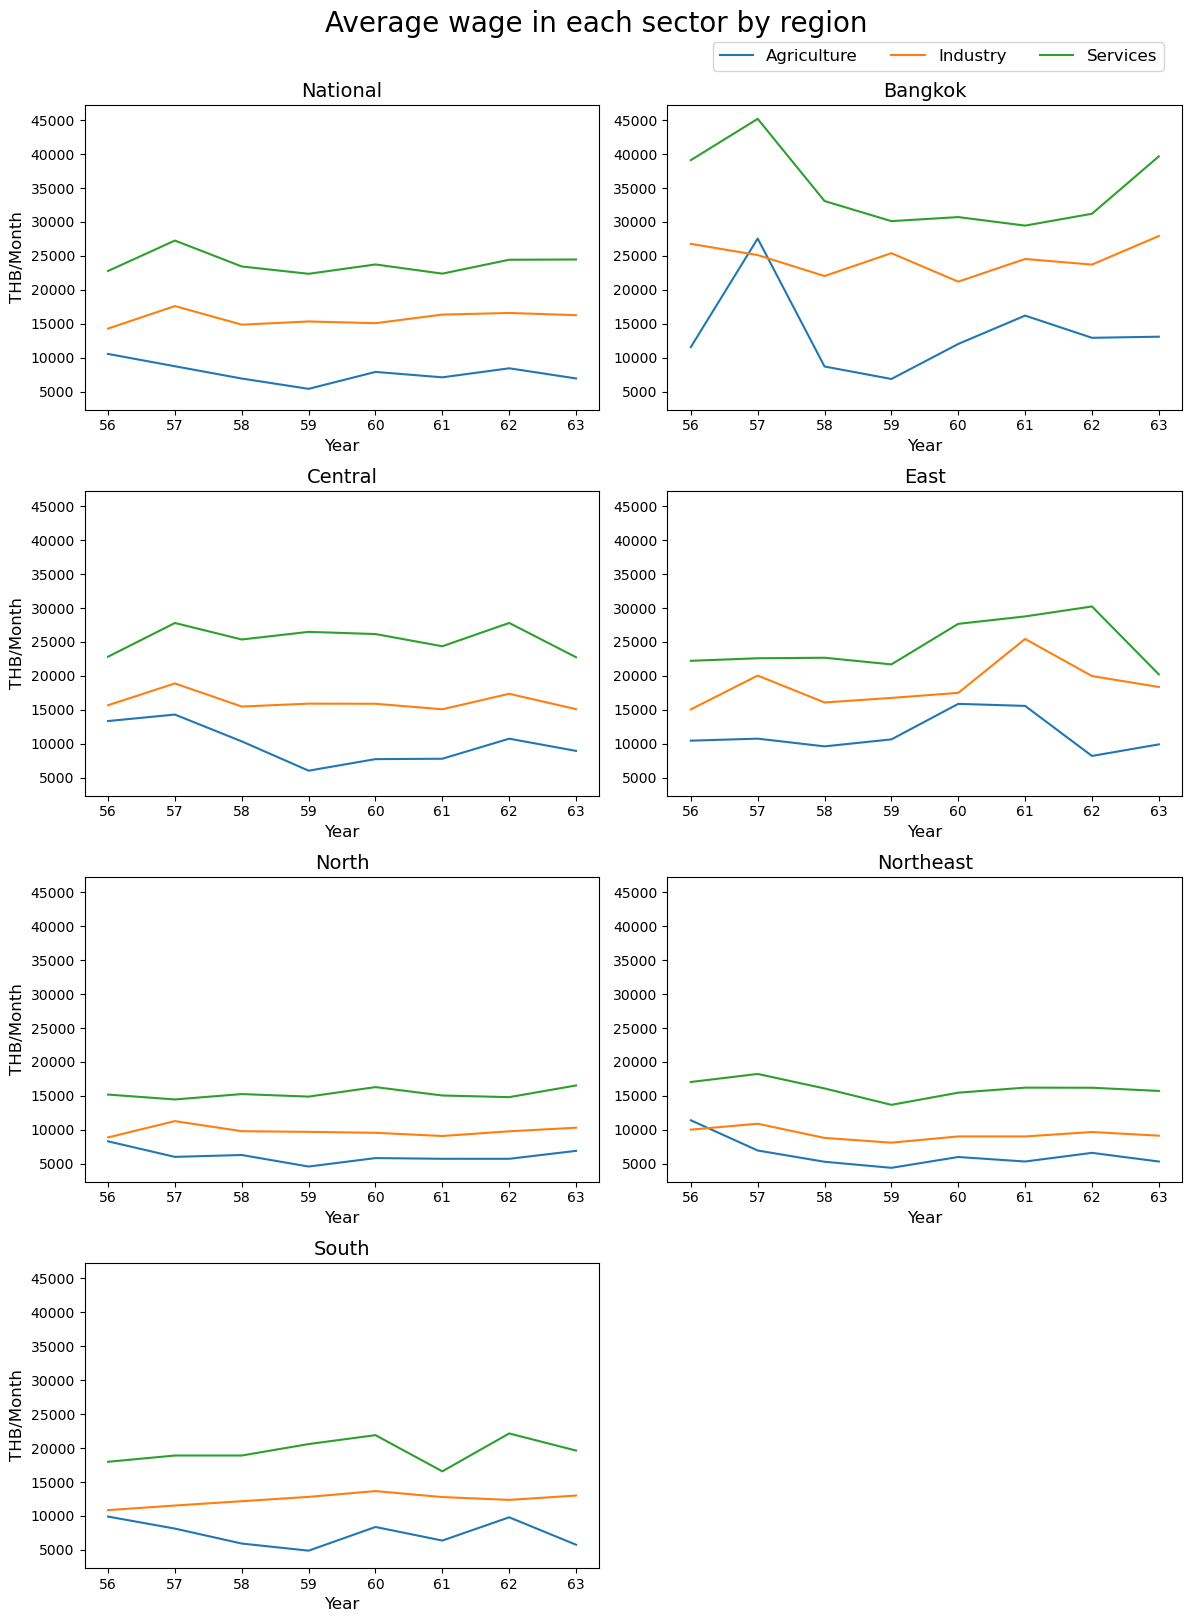

In [84]:
### Plot the average wage in each sector by year.
fig, axs = plt.subplots(4, 2, figsize=(12, 16), sharey = True)

region_names = ["National", "Bangkok", "Central", "East", "North", "Northeast", "South"]

## Line plot for each sector.
for region, ax in zip(region_names[:-1], axs.ravel()):
    reg_num = region_names.index(region)
    sns.lineplot(data = All_YEAR_WAGE_SEC_annual_final[All_YEAR_WAGE_SEC_annual_final["REG_NEW"] == reg_num], x = "Year", y = "WAGE", hue = "SECTOR", ax = ax, palette = "tab10", legend=False)
    ax.set_title(region, fontsize = 14)
    ax.set_ylabel('THB/Month', fontsize = 12)
    ax.set_xlabel('Year', fontsize = 12)
    ax.yaxis.set_tick_params(labelbottom=True) ## To retain the value labels on the axis.

## Plot region 6.
sns.lineplot(data = All_YEAR_WAGE_SEC_annual_final[All_YEAR_WAGE_SEC_annual_final["REG_NEW"] == 6], x = "Year", y = "WAGE", hue = "SECTOR", ax = axs[3,0], palette = "tab10")
axs[3,0].set_title('South', fontsize = 14)
axs[3,0].set_ylabel('THB/Month', fontsize = 12)
axs[3,0].set_xlabel('Year', fontsize = 12)
axs[3,0].get_legend().remove()
axs[3,0].yaxis.set_tick_params(labelbottom=True)

## Remove the empty subplot.
fig.delaxes(axs[3,1])

## Add main title.
fig.suptitle('Average wage in each sector by region', fontsize = 20, y = 1.01)

## Add a legend.
handles, labels = axs[3,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize = 12, ncols = 3, bbox_to_anchor=(0.98, 0.995))

fig.tight_layout(pad=1.0)


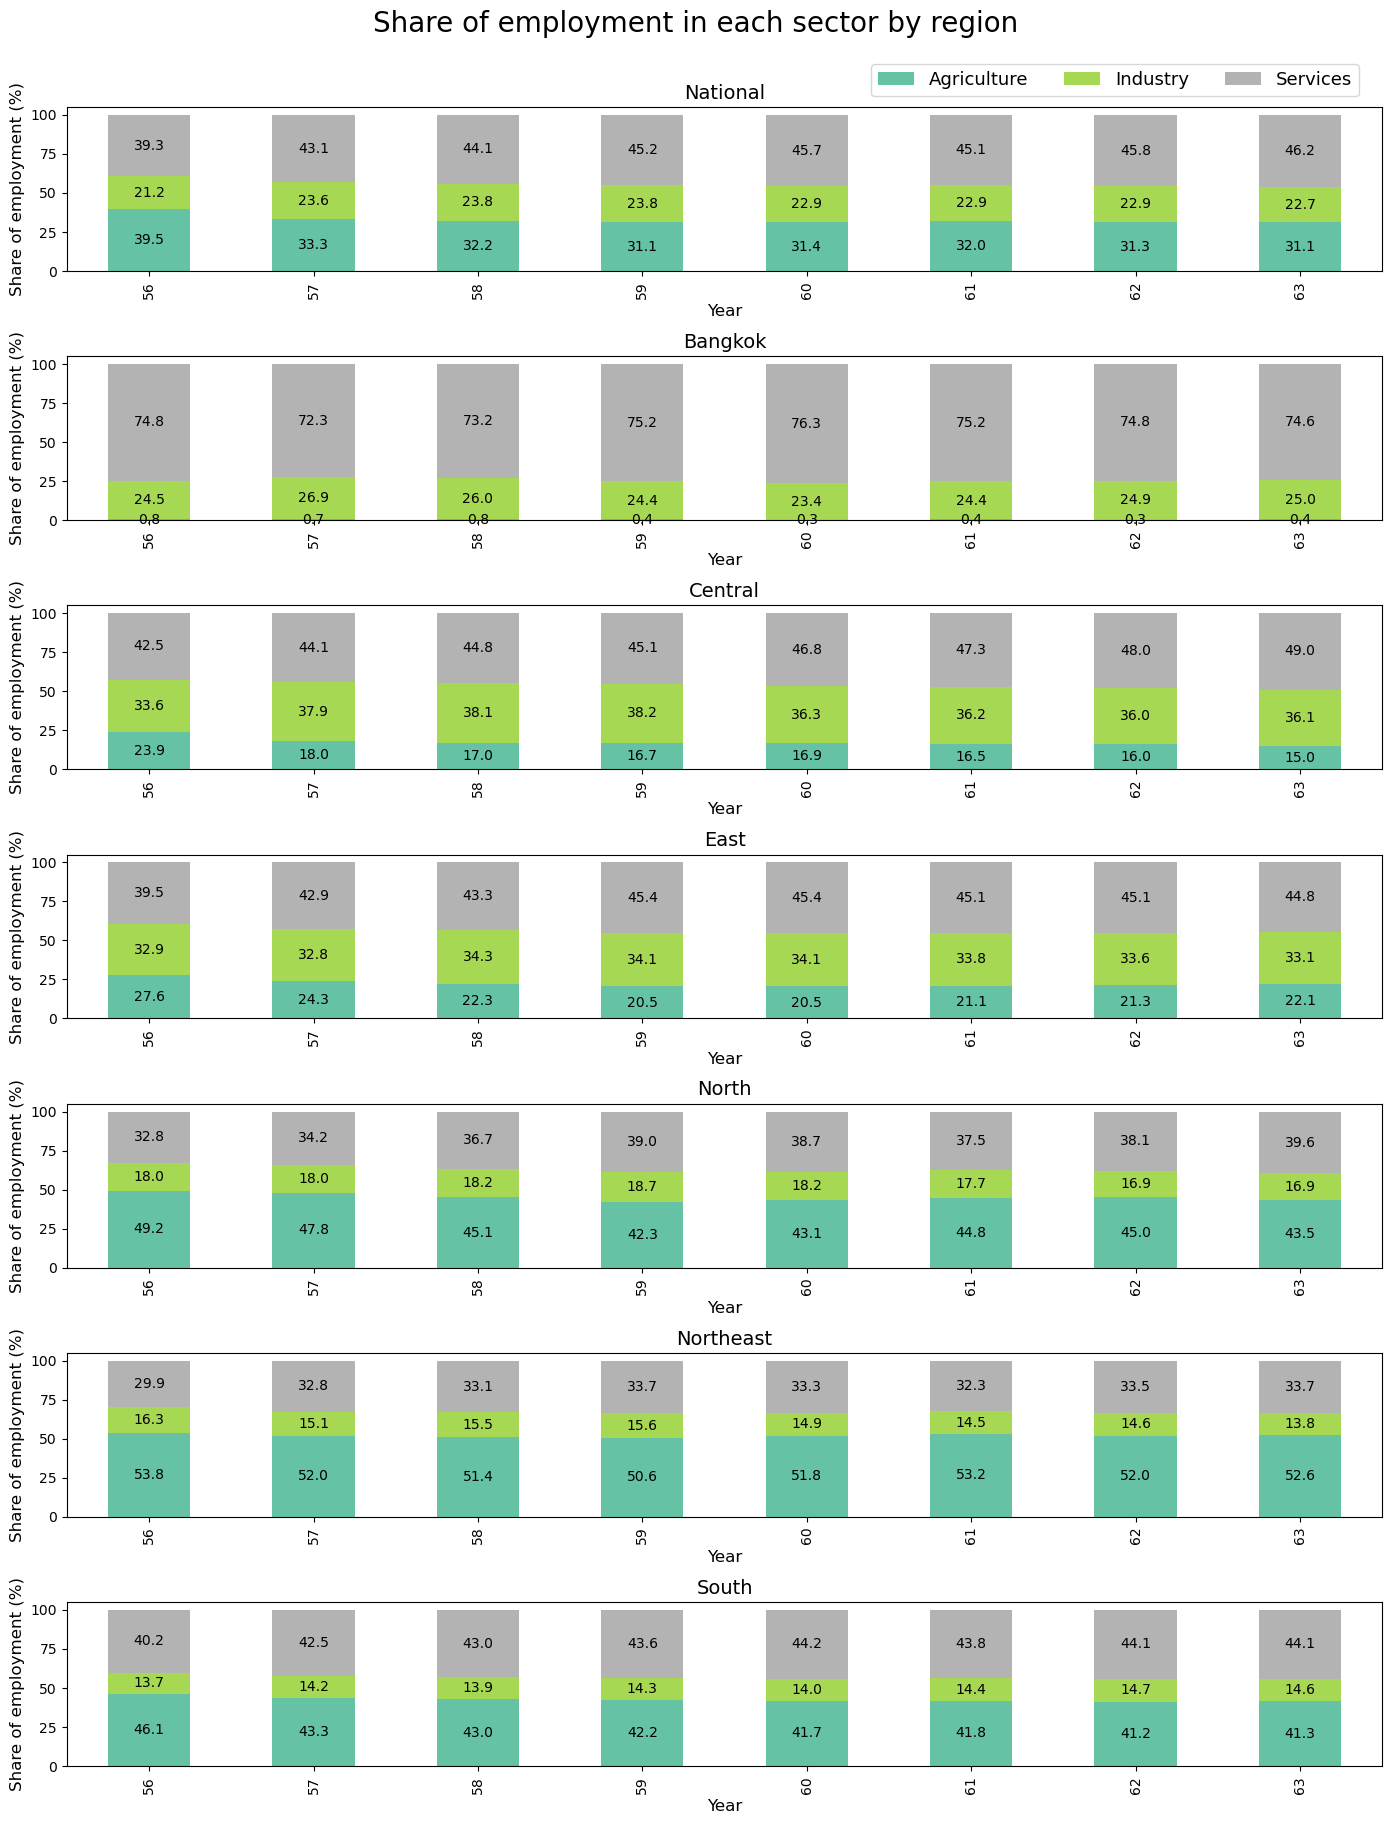

In [85]:
#### Plot the shares of sectors in each year.
### Each region as a subplot.
fig, axs = plt.subplots(7, 1, figsize=(14, 18))

for ax, region in enumerate(region_names[:-1]):
    # reshape the data to a wide format then Plot
    pd.pivot_table(All_YEAR_ALL_AGE_SEC_annual_pct_final[All_YEAR_ALL_AGE_SEC_annual_pct_final["REG_NEW"] == ax], index = "Year", columns = "SECTOR", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[ax], legend=False, colormap='Set2')
    axs[ax].set_title(region, fontsize = 14)
    axs[ax].set_ylabel('Share of employment (%)', fontsize = 12)
    axs[ax].set_xlabel('Year', fontsize = 12)

    # Add value labels.
    for p in axs[ax].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axs[ax].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center')

## Plot region 6.
pd.pivot_table(All_YEAR_ALL_AGE_SEC_annual_pct_final[All_YEAR_ALL_AGE_SEC_annual_pct_final["REG_NEW"] == 6], index = "Year", columns = "SECTOR", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[6], legend=True, colormap='Set2')
axs[6].set_title('South', fontsize = 14)
axs[6].set_ylabel('Share of employment (%)', fontsize = 12)
axs[6].set_xlabel('Year', fontsize = 12)
axs[6].get_legend().remove()

# Add value labels.
for p in axs[6].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axs[6].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center') # annotate point x y with text.

## Add a legend.
handles, labels = axs[6].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize = 13, ncols = 3, bbox_to_anchor=(0.98, 0.985))

## Add main title.
fig.suptitle('Share of employment in each sector by region', fontsize = 20, y =1.01)

fig.tight_layout(pad=1.0)


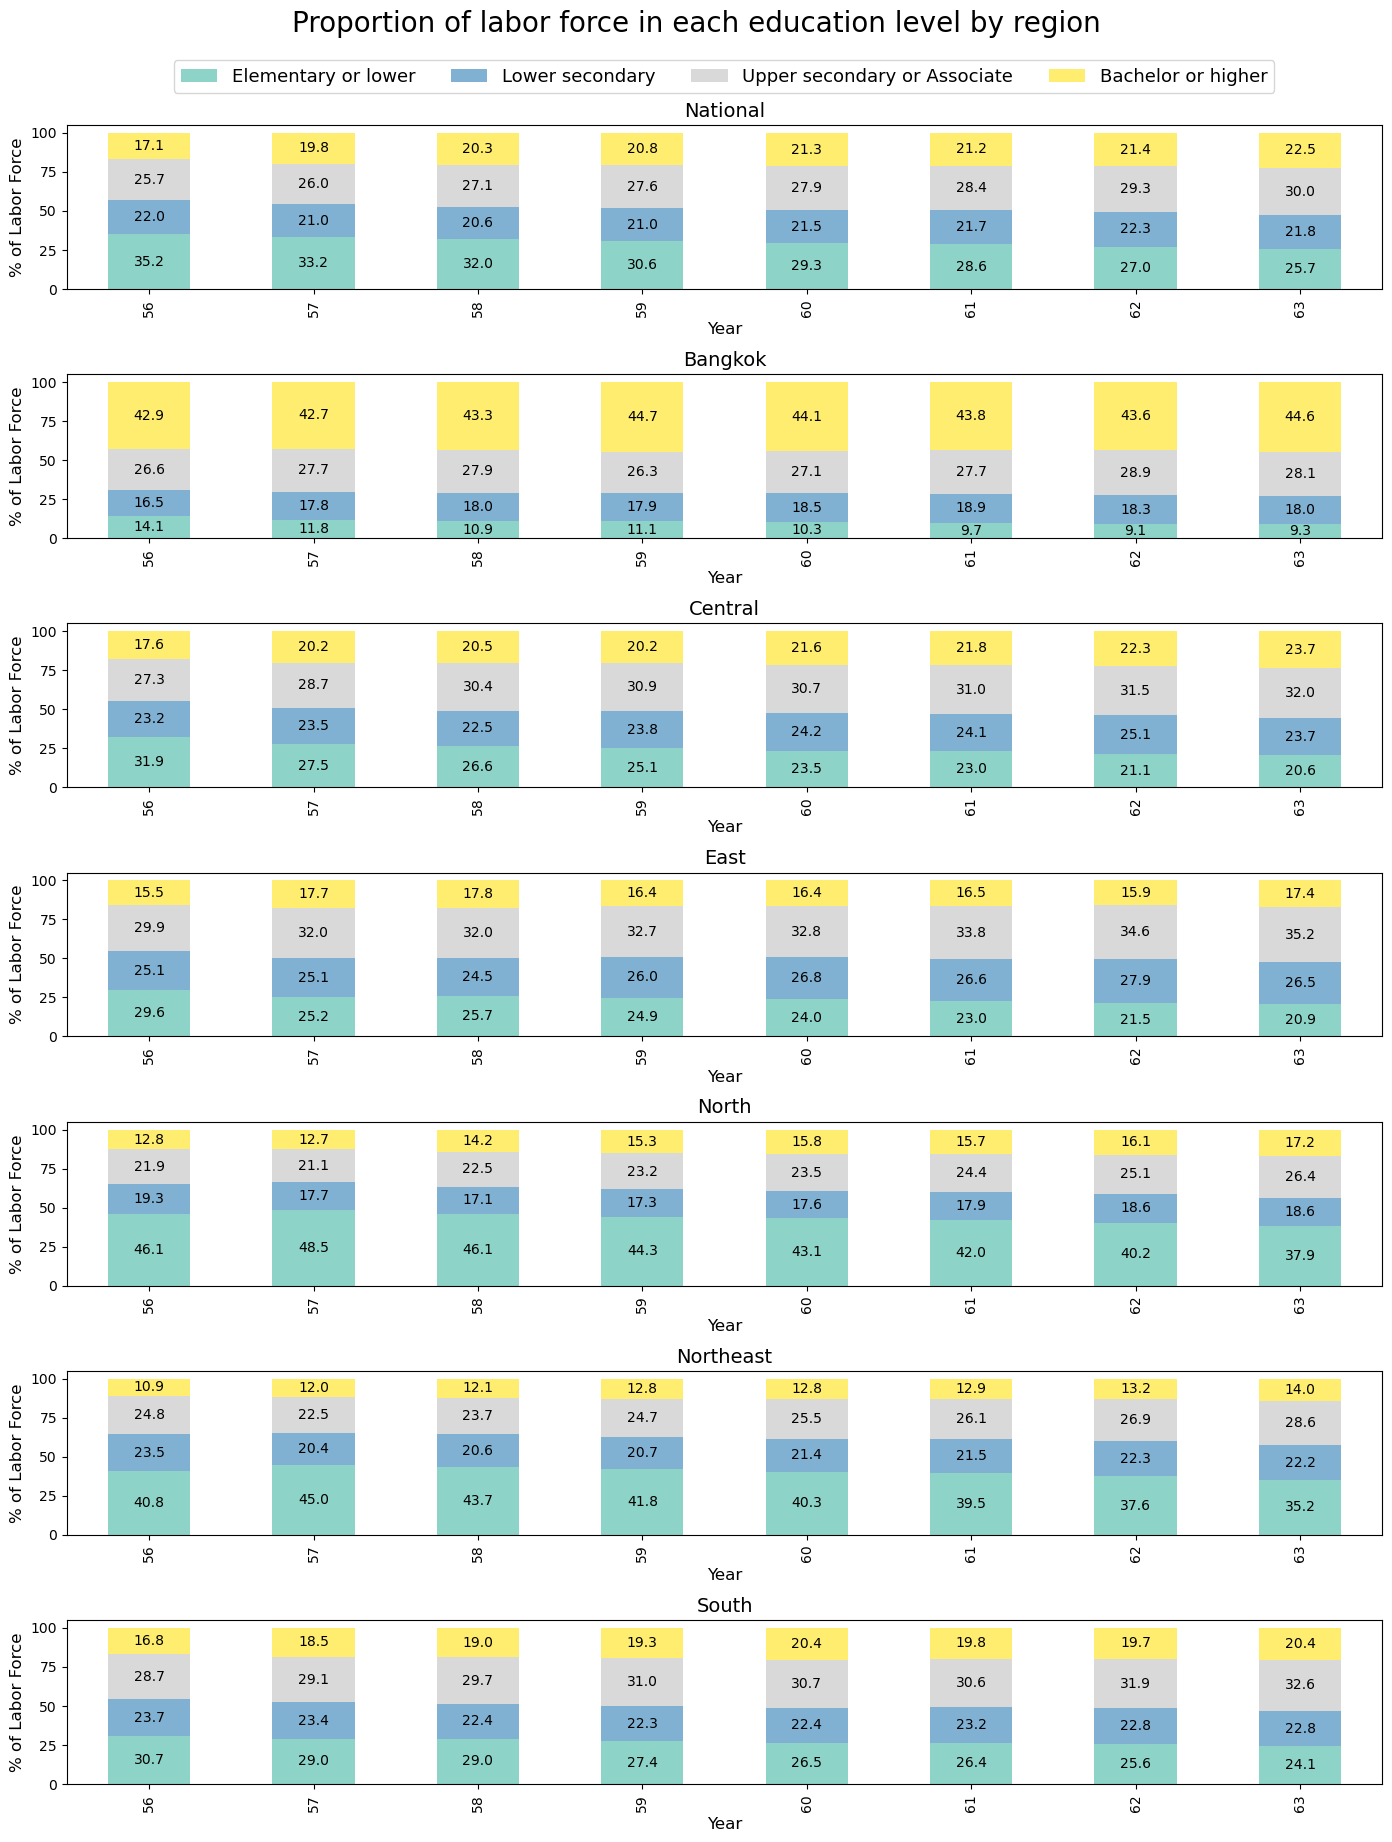

In [86]:
### Plot education level shares in each year.
### Each region as a subplot.
fig, axs = plt.subplots(7, 1, figsize=(14, 18))

for ax, region in enumerate(region_names[:-1]):
    # reshape the data to a wide format then Plot
    pd.pivot_table(All_YEAR_ALL_AGE_EDU_annual_pct_final[All_YEAR_ALL_AGE_EDU_annual_pct_final["REG_NEW"] == ax], index = "Year", columns = "EDCODE_NEW", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[ax], legend=False, colormap='Set3')
    axs[ax].set_title(region, fontsize = 14)
    axs[ax].set_ylabel('% of Labor Force', fontsize = 12)
    axs[ax].set_xlabel('Year', fontsize = 12)

    # Add value labels.
    for p in axs[ax].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axs[ax].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center')

## Plot region 6.
pd.pivot_table(All_YEAR_ALL_AGE_EDU_annual_pct_final[All_YEAR_ALL_AGE_EDU_annual_pct_final["REG_NEW"] == 6], index = "Year", columns = "EDCODE_NEW", values = "Percentage").plot(kind = "bar", stacked = True, ax = axs[6], colormap='Set3')
axs[6].set_title('South', fontsize = 14)
axs[6].set_ylabel('% of Labor Force', fontsize = 12)
axs[6].set_xlabel('Year', fontsize = 12)
axs[6].yaxis.set_tick_params(labelbottom=True)
axs[6].get_legend().remove()

# Add value labels.
for p in axs[6].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axs[6].annotate(round(height,1), (x + width/2, y + height/2), ha='center', va='center') # annotate point x y with text.

## Add a legend.
handles, labels = axs[6].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', fontsize = 13, ncols = 5, bbox_to_anchor=(0.52, 0.997))

## Add main title.
fig.suptitle('Proportion of labor force in each education level by region', fontsize = 20, y = 1.02)

fig.tight_layout(pad=1.0)